## ESMA 3016
## Edgar Acuna
### Septiembre 2020
### Lab12: Distribucion binomial

### $P[X=k]={n\choose k} p^k(1-p)^{n-k}$,

$k=0,1,2,...n$

In [16]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
#Calculo de la probabilidad binomial para n=6, p=.35 y x=2 exitos
binom.pmf(2,6,.35)

0.32800523437499995

In [18]:
#Calculo de todas las probabilidades binomiales
x=np.arange(0,7)
a=pd.DataFrame(binom.pmf(x,6,.35))
print(a)

          0
0  0.075419
1  0.243661
2  0.328005
3  0.235491
4  0.095102
5  0.020484
6  0.001838


In [19]:
#Verificando que la suma de todas las probabilidades da 1
binom.pmf(x,6,.35).sum()

1.0

In [20]:
#Calculando la probabilidad acumulada hasta x=1, con n=6 y p=.35 
binom.cdf(1,6,.35)

0.319079921875

In [21]:
#Calculando todas las probabilidades acumuladas 
binom.cdf(x,6,.35)

array([0.07541889, 0.31907992, 0.64708516, 0.88257609, 0.9776782 ,
       0.99816173, 1.        ])

In [22]:
#Calculando el quantil del 64%
binom.ppf(.64,6,.35)

2.0

In [26]:
#Generando una muestra de 1000 valores de una binomial con n=6 y p=.35
a=binom.rvs(6,.35,size=10000)

In [27]:
#Hallando las frecuencias relativas de la muestra generada
unique_elements, counts_elements = np.unique(a, return_counts=True)
prob_sim=counts_elements/float(10000)
prob_sim

array([0.0728, 0.2406, 0.3276, 0.2429, 0.0944, 0.0197, 0.002 ])

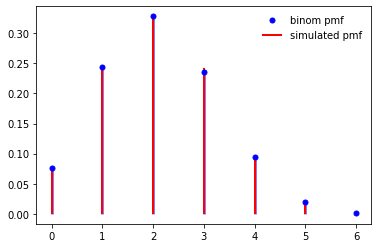

In [28]:
#Plot para comparar las probabilidades exactas de una binomial con las probabilidades simuladas
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, 6, .35), 'bo', ms=5, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, 6, .35), colors='b', lw=3, alpha=0.5)
ax.vlines(x, 0, prob_sim, colors='r', linestyles='-', lw=2,label='simulated pmf')
ax.legend(loc='best', frameon=False)

Ejemplo: Sea X: Número de preguntas bien contestadas por un estudiante que responde al azar un examen 
tipo selección múltiple que consiste de 10 preguntas, cada una con 4 alternativas de las cuales sólo una es correcta.
calcular la probabilidad de que el estudiante: 

i)Tenga exactamente 3 preguntas buenas.

ii)Tenga a lo mas 6 preguntas buenas.

iii)Tenga por lo menos 3 buenas.

iv)Tenga por lo menos 2 malas

In [11]:
#soluciones
#X es una binomial con n=10 y p=1/4=.25
#i
binom.pmf(3,10,.25)

0.2502822875976565

In [12]:
#ii)
binom.cdf(6,10,.25)

0.9964942932128906

In [13]:
#iii)Por conplemento
1-binom.cdf(2,10,.25)

0.4744071960449219

In [14]:
#iv)Por complememto, cambiando la p
1-binom.cdf(1,10,.75)
#Cambiando la pregunta a buenos
binom.cdf(8,10,.25)

0.9999704360961914

In [15]:
#Calculando la media de una binomial
x=np.arange(0,11)
mu=x*binom.pmf(x,10,.25)
mu.sum()

2.500000000000002